<a href="https://colab.research.google.com/github/rezandiadiatma/datamining/blob/main/TugasPertemuan6_KlasifikasidenganKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("databiostats.csv")
x = dataset.iloc[:, [2,4]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[ 41 170]
 [ 42 166]
 [ 32 155]
 [ 39 167]
 [ 30 124]
 [ 33 115]
 [ 26 121]
 [ 30 158]
 [ 53 175]
 [ 32 143]
 [ 47 139]
 [ 34 163]
 [ 23  98]
 [ 36 160]
 [ 38 145]
 [ 31 135]
 [ 29 176]
 [ 28 131]]


In [4]:
print(y)

[0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
print(x_train)

[[ 30 124]
 [ 32 155]
 [ 29 176]
 [ 28 131]
 [ 32 143]
 [ 30 158]
 [ 36 160]
 [ 34 163]
 [ 39 167]
 [ 41 170]
 [ 33 115]
 [ 31 135]
 [ 23  98]]


In [7]:
print(x_test)

[[ 42 166]
 [ 26 121]
 [ 53 175]
 [ 47 139]
 [ 38 145]]


In [8]:
print(y_train)

[1 0 1 1 1 0 0 1 0 0 0 0 0]


In [9]:
print(y_test)

[0 1 0 1 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[-0.47642755 -0.95674742]
 [-0.03403054  0.40568795]
 [-0.69762605  1.32862804]
 [-0.91882456 -0.64910072]
 [-0.03403054 -0.12170639]
 [-0.47642755  0.53753654]
 [ 0.85076348  0.62543559]
 [ 0.40836647  0.75728418]
 [ 1.51435899  0.93308229]
 [ 1.956756    1.06493087]
 [ 0.18716797 -1.35229317]
 [-0.25522904 -0.47330261]
 [-2.02481708 -2.09943515]]


In [12]:
print(x_test)

[[ 2.1779545   0.88913276]
 [-1.36122156 -1.088596  ]
 [ 4.61113805  1.28467851]
 [ 3.28394702 -0.2975045 ]
 [ 1.29316049 -0.03380733]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0]
 [2 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


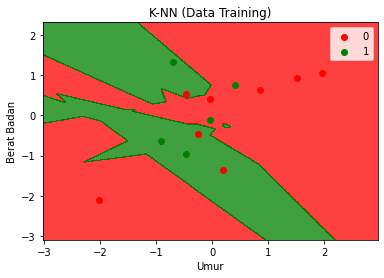

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Berat Badan')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


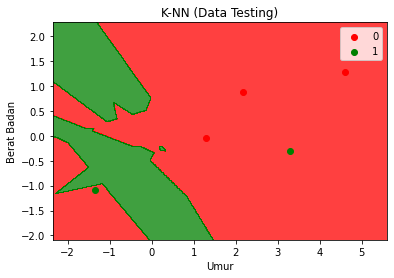

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Berat Badan')
plt.legend()
plt.show()